# Эксперимент Майкельсона

*Оригинал: ШАД, курс "Прикладная аналитика"*

Данные классического эксперимента Майкельсона по измерению скорости света с помощью вращающегося зеркала, 100 наблюдений:

In [2]:
speed <- scan("speed.txt")
print(speed)

  [1] 299850 299740 299900 300070 299930 299850 299950 299980 299980 299880
 [11] 300000 299980 299930 299650 299760 299810 300000 300000 299960 299960
 [21] 299960 299940 299960 299940 299880 299800 299850 299880 299900 299840
 [31] 299830 299790 299810 299880 299880 299830 299800 299790 299760 299800
 [41] 299880 299880 299880 299860 299720 299720 299620 299860 299970 299950
 [51] 299880 299910 299850 299870 299840 299840 299850 299840 299840 299840
 [61] 299890 299810 299810 299820 299800 299770 299760 299740 299750 299760
 [71] 299910 299920 299890 299860 299880 299720 299840 299850 299850 299780
 [81] 299890 299840 299780 299810 299760 299810 299790 299810 299820 299850
 [91] 299870 299870 299810 299740 299810 299940 299950 299800 299810 299870


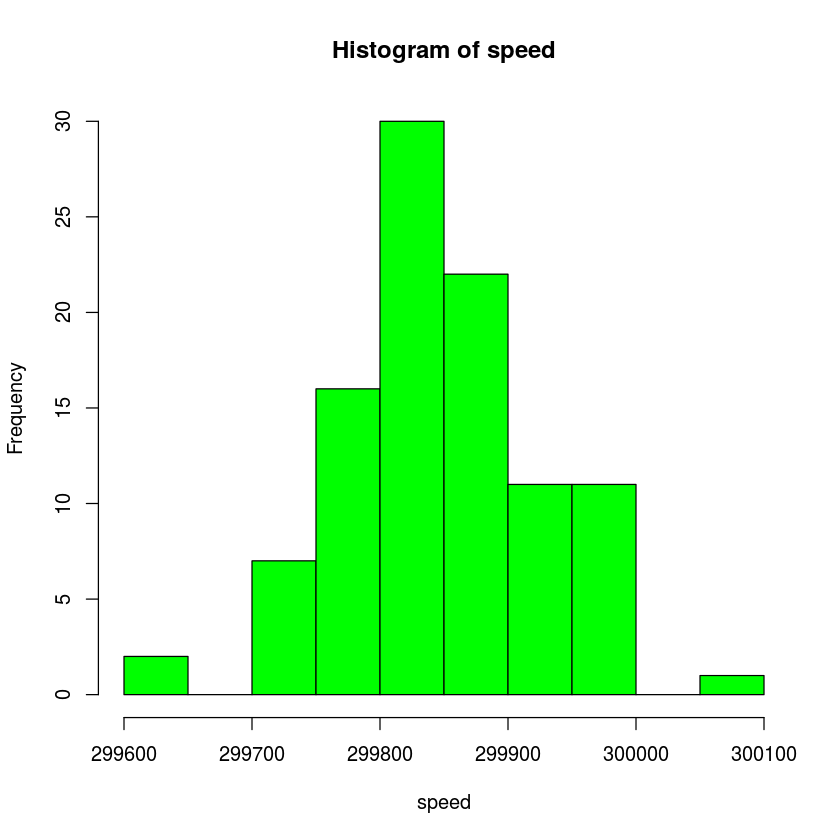

In [4]:
hist(speed, col = 'green')

Можно ли считать наблюдения нормально распределёнными?

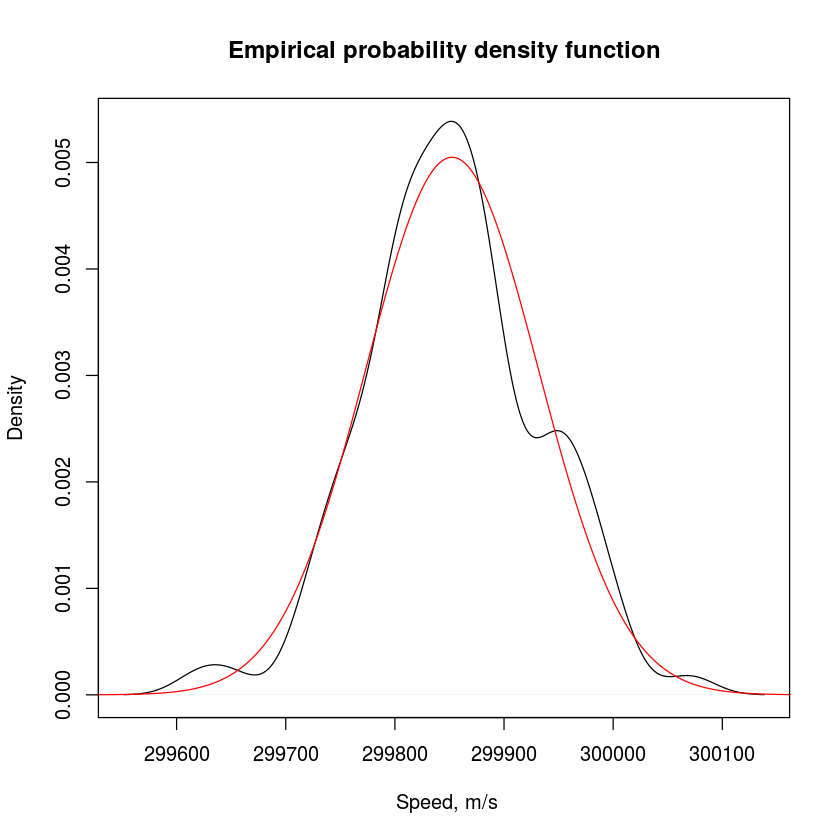

In [5]:
plot(density(speed), main = "Empirical probability density function", xlab = " Speed, m/s")
x <- seq(min(speed)-1000, max(speed)+1000, by = 1)
lines(x, dnorm(x, mean = mean(speed), sd = sd(speed)), col = "red")

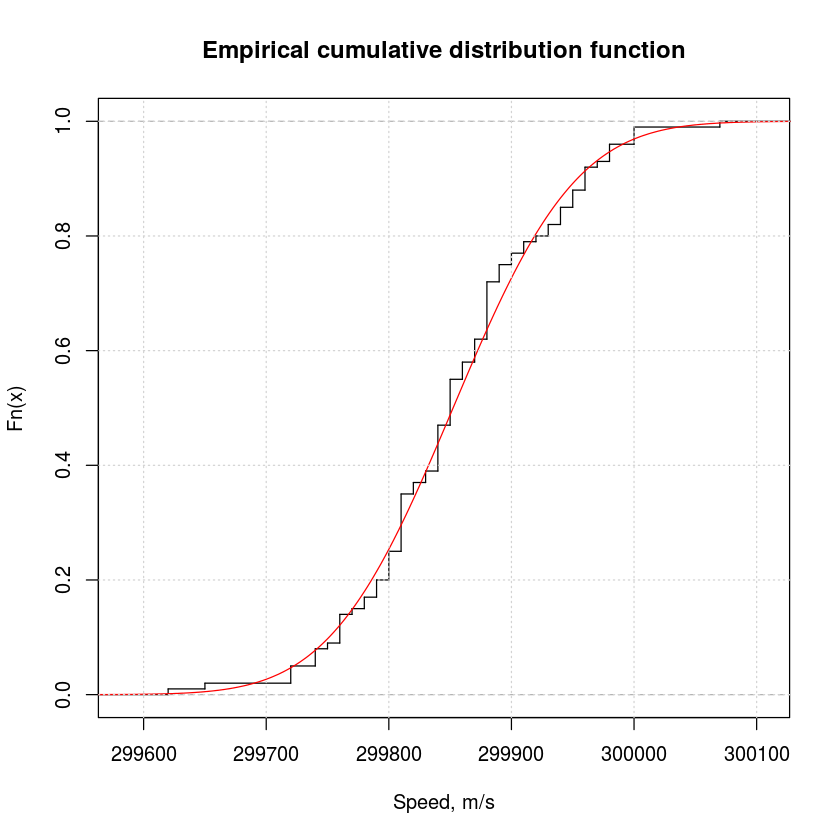

In [7]:
plot(ecdf(speed), verticals = TRUE, pch=NA, 
     main="Empirical cumulative distribution function", 
     xlab="Speed, m/s")
lines(x, pnorm(x, mean = mean(speed), sd = sd(speed)), col="red")
grid()

Q-Q plot

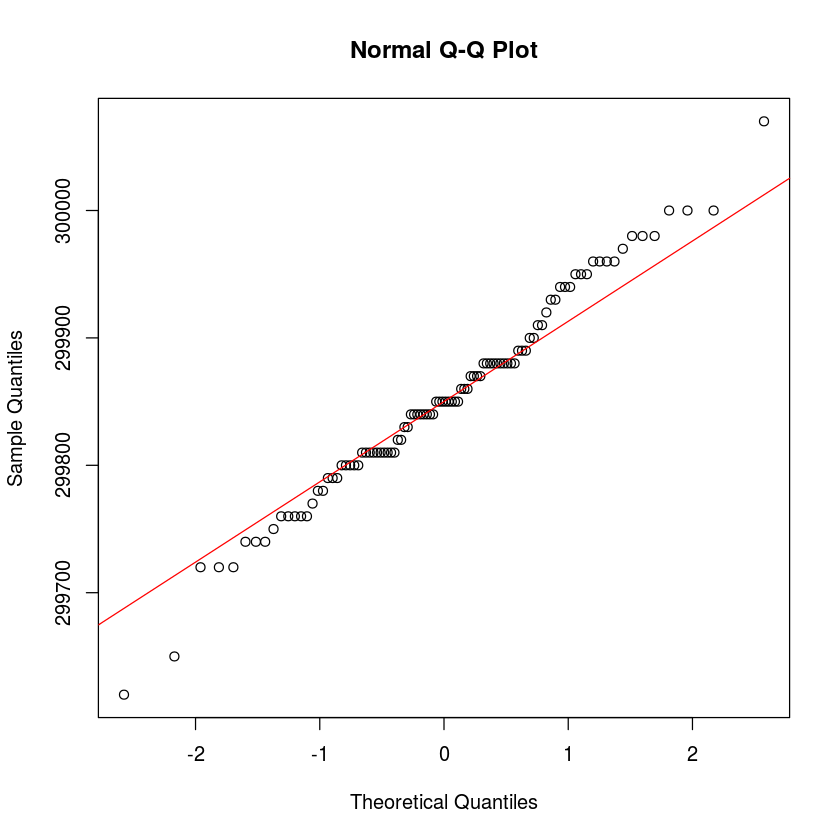

In [8]:
qqnorm(speed)
qqline(speed, col="red")

Критерии Колмогорова (Лиллиефорса), Андерсона-Дарлинга, Крамера-фон Мизеса:

In [13]:
lillie.test(speed)
ad.test(speed)
cvm.test(speed)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  speed
D = 0.083424, p-value = 0.08289



	Anderson-Darling normality test

data:  speed
A = 0.46076, p-value = 0.255



	Cramer-von Mises normality test

data:  speed
W = 0.077203, p-value = 0.2227


Критерий Харке-Бера:

In [17]:
# install.packages('normtest')
library(normtest)
jb.norm.test(speed)


	Jarque-Bera test for normality

data:  speed
JB = 0.29492, p-value = 0.861


Критерий Шапиро-Уилка:

In [14]:
shapiro.test(speed)


	Shapiro-Wilk normality test

data:  speed
W = 0.98807, p-value = 0.5137


Процедура множественной проверки гипотез

In [35]:
pvals <- c(0.08289, 0.255, 0.2227, 0.861, 0.5137)
corrected_pvals <- p.adjust(pvals, method = 'BH')
corrected_pvals

[1] 0.414450 0.425000 0.425000 0.861000 0.642125

Michelson A.A. **Experimental determination of the velocity of light made at the U.S. Naval Academy, Annapolis.** Astronomical Papers, 1, 109-145, 1880.